# Estadísticas Básicas del Lenguaje

### Configuración inicial

- En este notebook vamos a descargar el dataset book que contiene muchos libros en ingles de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzippi

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [4]:
print(len(text1))

260819


## Medida de riqueza lexica en un texto:

$$
R_t=\frac{total~de~palabras~unicas}{total~de~palabras}=\frac{longitud~del~vocabulario}{longitud~del~texto}
$$

Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en un libro)

[Python Sets](https://docs.python.org/2/library/sets.html)

**Vocabulario:** Lista de palabras únicas de un lenguaje

In [5]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [7]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [8]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [11]:
def porcentaje_palabra(palabra, texto):
    return 100*texto.count(palabra)/len(texto)

In [12]:
porcentaje_palabra('monster', text1)

0.018786974875296663

In [13]:
text1.count('monster')

49

## Distribuciones de frecuencua de palabras

### Estadística del Lenguaje

Los cálculos estdísticos más simples que se puede efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

- Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.
- ejemplo dic = {'monster': 49, 'boat': 54, ...}

In [14]:
dic = {}
for palabra in set(text1):
    dic[palabra] = text1.count(palabra)
dic

{'exordium': 1,
 'engrossing': 1,
 'FIRMLY': 1,
 'Whirlpooles': 1,
 'Hind': 1,
 'averted': 3,
 'supplying': 2,
 'tea': 5,
 'vulture': 3,
 'told': 45,
 'handed': 10,
 'NOUN': 1,
 'verbalists': 1,
 'vow': 4,
 'extend': 1,
 'blackest': 1,
 'pre': 6,
 'SHAKING': 1,
 'sceptical': 2,
 'Lad': 1,
 'instructions': 1,
 'unfavourable': 1,
 'pirouetting': 1,
 'colour': 16,
 'disks': 1,
 'mahogany': 2,
 'bedsteads': 1,
 'compliance': 1,
 'nature': 34,
 'Consequently': 1,
 'restricting': 1,
 'natives': 3,
 'eight': 24,
 'revelations': 2,
 'Tormentoto': 1,
 'ROBERT': 1,
 'gloomy': 5,
 'stumbled': 1,
 'fragments': 3,
 'Lazarus': 5,
 'flowering': 1,
 'replaced': 4,
 'follows': 4,
 'untattooed': 1,
 'supernaturalness': 1,
 'fetid': 1,
 'shameful': 2,
 'bought': 1,
 'shared': 2,
 'sperm': 104,
 'moss': 2,
 'account': 32,
 'simultaneous': 1,
 'topsail': 2,
 'THAT': 18,
 'doggedly': 1,
 'Rafters': 1,
 'scougin': 1,
 'maddening': 1,
 'Another': 8,
 'ALIVE': 1,
 'poorly': 1,
 'knaves': 1,
 'for': 1414,
 'Lan

Calcular la distribución de palabras como lo hicimos en la linea anterior no es la forma ideal ya que puede ser muy pesado computacionalmente, vemamos una forma mejor:

### Método FreqDist de NLTK

In [15]:
fdist = FreqDist(text1)

In [16]:
# Veamos las palabras más comunes
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

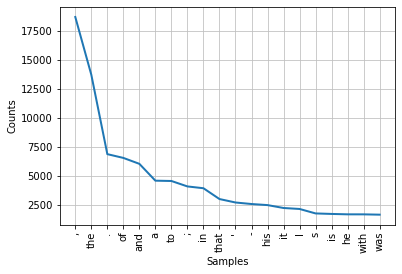

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
fdist.plot(20)

In [18]:
fdist['monster']

49

## Refinamiento y visualización de cuerpos de texto

### Distribuciones sobre contenido con filtro-fino

- Como vimos en la seccion anterior, los tokens mas frecuentes en un texto no son necesariamente las palabras que mas información nos arrojan sobre el contenido del mismo.
- Por ello, es mejor filtrar y construit distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [20]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función FreqDist, así:

```
fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]
```

Luego podemos convertir el objeto creado a formato de np.array de **Numpy** para poder hacer un sort por palabras mas frecuentes.

```
fdist_filtrado = np.array(fdist_filtrado, *args)

np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]
```

In [24]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)

In [26]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

### Visualización

Construcción de un grafico de barras customizado con [Matplotlib](https://matplotlib.org/3.2.1/contents.html#)

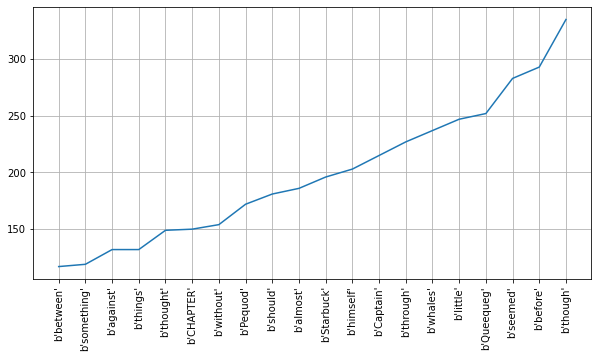

In [28]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()